In [11]:
import pandas as pd
import seaborn as sns
from matplotlib  import pyplot as plt

In [12]:
prospects_calendar = pd.read_csv("../data/prospects_calendar.csv")

In [13]:
prospects_calendar.head()

,prospect_name,week,revenue
0,Prospect_0,1,0.00
1,Prospect_0,2,0.00
2,Prospect_0,3,0.00
3,Prospect_0,4,0.00
4,Prospect_0,5,0.17


In [5]:
prospects_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prospect_name  1560 non-null   object 
 1   week           1560 non-null   int64  
 2   revenue        1560 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 36.7+ KB


In [34]:
prospects_calendar.describe()

,week,revenue
count,1560.000000,1560.000000
mean,26.500000,0.257000
std,15.013144,0.246243
min,1.000000,0.000000
25%,13.750000,0.070000
50%,26.500000,0.190000
75%,39.250000,0.390000
max,52.000000,1.000000


In [6]:
prospects_calendar.prospect_name.nunique()

30

In [35]:
prospects_calendar[prospects_calendar.isna().any(axis=1)]

,prospect_name,week,revenue


In [7]:
prospects_calendar[prospects_calendar.prospect_name == "Propect_0"]

,prospect_name,week,revenue
0,Propect_0,1,0.00
1,Propect_0,2,0.00
2,Propect_0,3,0.00
3,Propect_0,4,0.00
4,Propect_0,5,0.17
5,Propect_0,6,0.22
6,Propect_0,7,0.24
7,Propect_0,8,0.27
8,Propect_0,9,0.27
9,Propect_0,10,0.20


<AxesSubplot: xlabel='week', ylabel='revenue'>

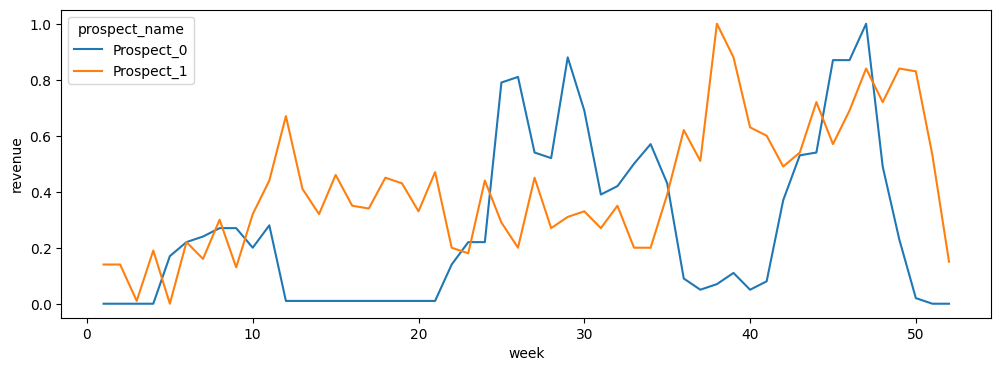

In [9]:
sub_prospects_calendar = prospects_calendar[prospects_calendar.prospect_name.isin(prospects_calendar.prospect_name.unique()[0:2])]
plt.figure(figsize=(12, 4))
sns.lineplot(data=sub_prospects_calendar, x="week", y="revenue", hue="prospect_name")

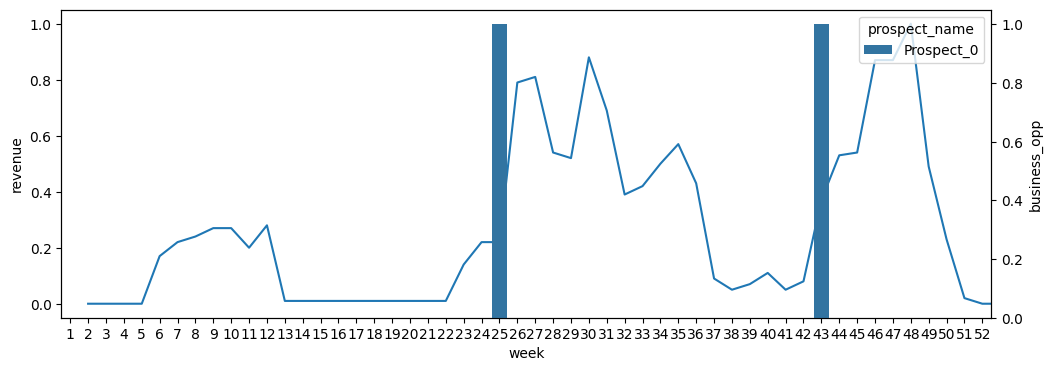

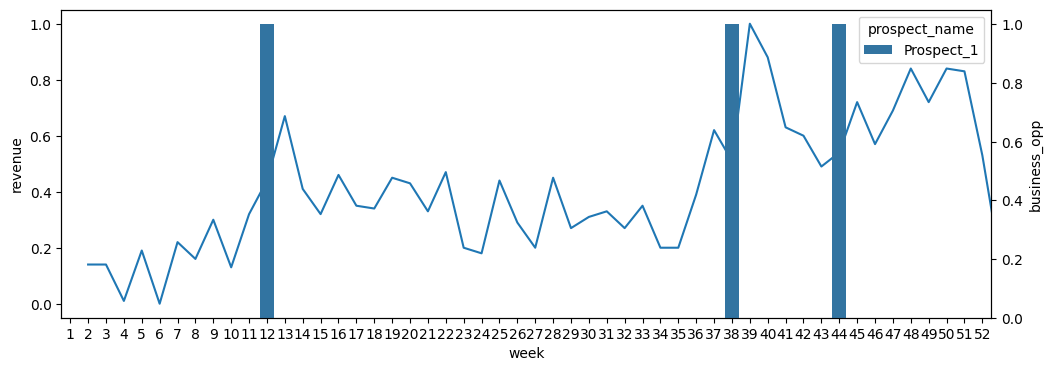

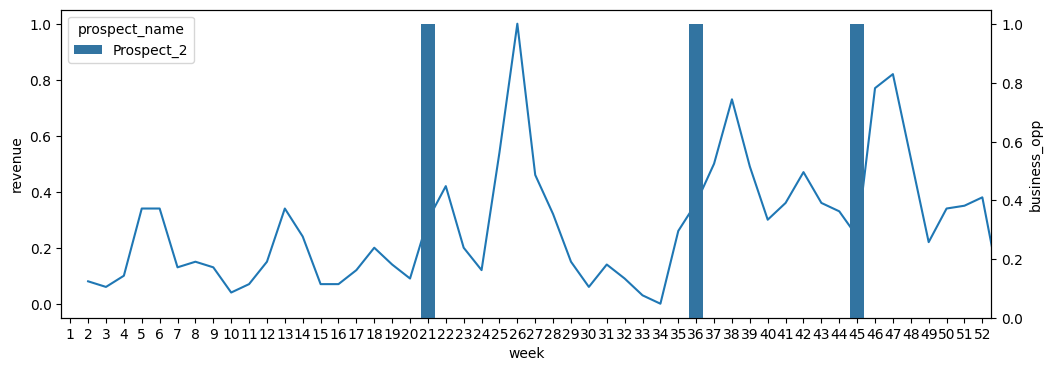

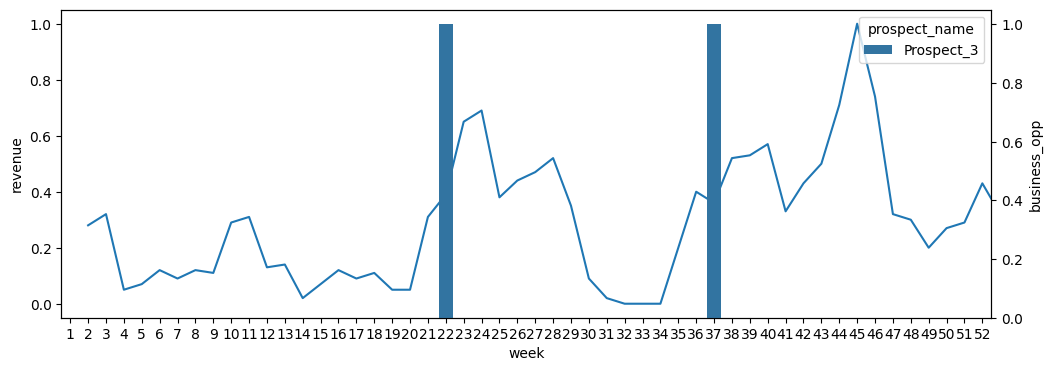

In [7]:
for prospect_name in sub_prospects_calendar.prospect_name.unique():
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2 = ax1.twinx()
    prospect_df = sub_prospects_calendar[sub_prospects_calendar.prospect_name == prospect_name].copy()
    prospect_df["business_opp"] = (
        # week revenue > 1.5 x average revenue 
        (prospect_df.revenue > prospect_df.revenue.mean() * 1.5)
        # week revenue of 3 previous weeks <= 1.5 x average revenue (to select the first start)
        & (prospect_df.revenue.shift(3) <= prospect_df.revenue.mean() * 1.5) 
        & (prospect_df.revenue.shift(2) <= prospect_df.revenue.mean() * 1.5) 
        & (prospect_df.revenue.shift(1) <= prospect_df.revenue.mean() * 1.5)
    )
    g = sns.lineplot(data=prospect_df, x="week", y="revenue", ax=ax1)
    g = sns.barplot(data=prospect_df, x="week", y="business_opp", hue="prospect_name", ax=ax2)
    plt.show()

## Validation

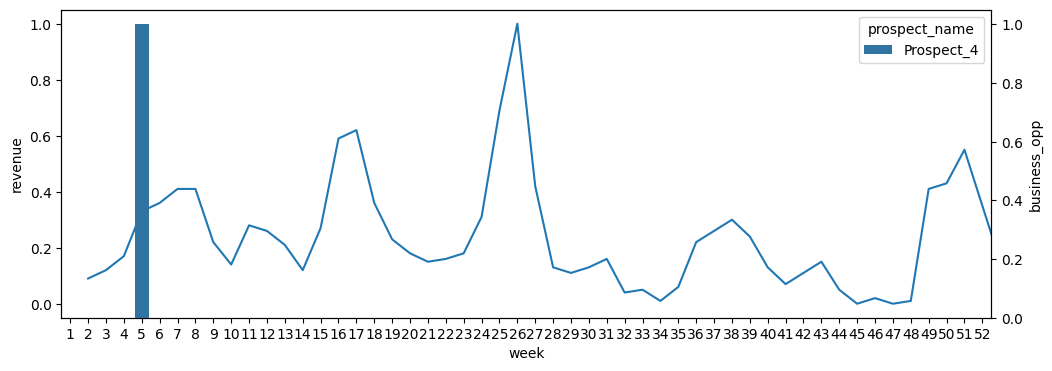

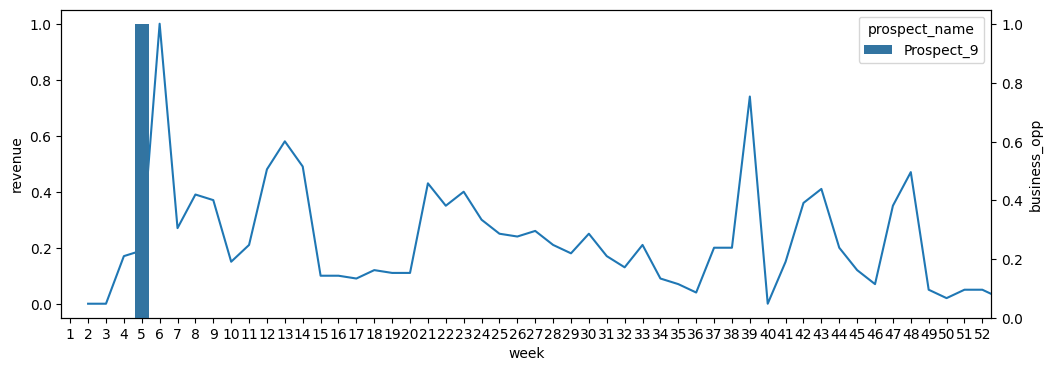

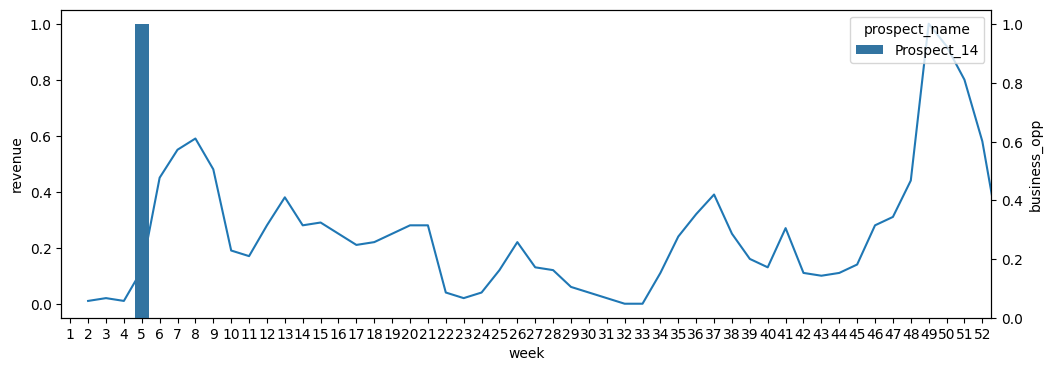

In [14]:
target_week = 5
week_prospects_df = pd.read_csv("../outputs/2023-01-05_prospects.csv")
week_prospects = week_prospects_df.prospect_name.unique()
prospects_data = prospects_calendar[prospects_calendar.prospect_name.isin(week_prospects)]
for prospect_name in prospects_data.prospect_name.unique():
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2 = ax1.twinx()
    prospect_df = prospects_calendar[prospects_calendar.prospect_name == prospect_name].copy()
    prospect_df["business_opp"] = prospect_df.week == target_week
    g = sns.lineplot(data=prospect_df, x="week", y="revenue", ax=ax1)
    g = sns.barplot(data=prospect_df, x="week", y="business_opp", hue="prospect_name", ax=ax2)
    plt.show()